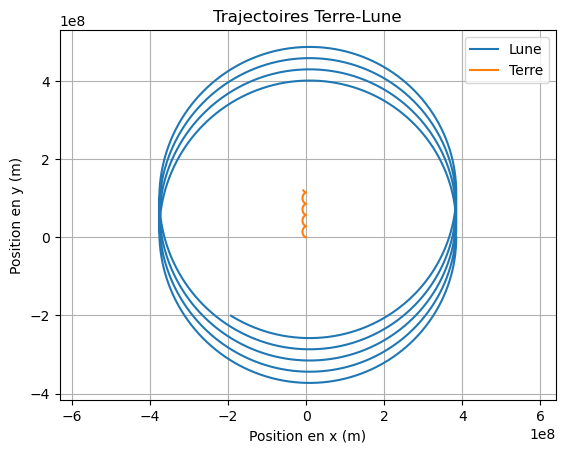

In [ ]:
import math
import numpy as np
import matplotlib.pyplot as plt

G = 6.67430e-11
MTerre = 5.97219e24
MLune = 7.3477e22
positionT = [0,0,0]
positionL = [3.844e8, 0, 0]
debug = False


xT = 0
yT = 0
zT = 0

xL = 3.844e8
yL = 0
zL = 0

vT_x = 0.0
vT_y = 0.0
vL_x = 0.0
vL_y = 1000 #m.s^-1
# 1000 m.s^-1


# l'intervalle de temps au bout de laquelle on calcule la nouvelle position
dT = 300



'''
Fx = F * dx / d
Fy = F * dy / d
Fz = F * dz / d
Prosuit scalaire

accélération Lune
aL_x = Fx/MLune
aL_y = Fy/MLune

accélération Terre
aT_x = Fx/MTerre
aT_y = Fy/MTerre


# différence de vitesse qu'on rajoute à chaque fois
vL_x += aL_x*dT 
vT_x += aT_x*dT

vL_y += aL_y * dT
vT_y += aT_y * dT

# += = rajoute à la valeur d'avant

# Mise à jour des positions (Euler), vrai uniquement si la vitesse est constante
xL += vL_x*dT
# dT = intervalle de temps, dT= t, xL=, donc d= v*t = xL += vL*dT
# Parce que la vitesse est la dérivée de la position, Nouvelle position = ancienne position + distance parcourue pendant dT
xT += vT_x*dT

yL += vL_y * dT
yT += vT_y * dT
'''

# avancement du temps
t = 60




# -------------------------------------------  représentation graphique  -------------------------------------------------------

# 1) stocker les infos : Le programme calcule les positions à chaque instant, mais si je ne les stockes pas quelque part,
# je ne pourras pas les tracer à la fin. Les listes vont conserver un historique des positions.

# position initial de la Lune = xL, yL
xL_list = [xL]
yL_list = [yL]
xT_list = [xT]
yT_list = [yT]


Tmax = 10000000

while t < Tmax:

    # 1. Mise à jour des positions relatives
    dx = xL-xT
    dy = yL-yT
    dz = zL-zT
    # calcul de la distance entre les deux astres avec le théorème de Pythagore 3 dimensions
    d = math.sqrt(dx*dx + dy*dy + dz*dz)

    # print(f"DEBUG - dx : {dx}")
    # print(f"DEBUG - dy : {dy}")

    # 2. Force gravitationnelle (norme)
    F = G * MTerre * MLune / d**2

    # 3. Décomposition de la force
    FxL = F * dx / d
    FyL = F * dy / d
    FzL = F * dz / d
    # print(f"DEBUG - FxL : {FxL}")
    # print(f"DEBUG - FyL : {FyL}")
    

    FxT = -FxL
    FyT = -FyL
    FzT = -FzL

    # 4. accélération Lune
    aL_x = FxL/MLune
    aL_y = FyL/MLune

    # accélération Terre
    aT_x = FxT/MTerre
    aT_y = FyT/MTerre

    # 5. Mise à jour des vitesses
    vL_x += aL_x*dT 
    vT_x += aT_x*dT

    vL_y += aL_y * dT
    vT_y += aT_y * dT

    # 6. Mise à jour des positions
    xL += -vL_x*dT
    xT += vT_x*dT

    yL += -vL_y * dT
    yT += vT_y * dT

    # 7. Stockage des positions
    xL_list.append(xL)
    yL_list.append(yL)
    xT_list.append(xT)
    yT_list.append(yT)
    # print(xL_list)

    # 8. Temps
    t += dT


plt.plot(xL_list, yL_list, label="Lune")
plt.plot(xT_list, yT_list, label="Terre")
plt.xlabel("Position en x (m)")
plt.ylabel("Position en y (m)")
plt.title("Trajectoires Terre-Lune")
plt.legend()
plt.axis("equal")  # pour garder les proportions correctes
plt.grid(True)
plt.show()
